In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load Raw Data

df_data= pd.read_csv('/content/drive/MyDrive/Skripsi/dataset.csv', delimiter=";")
df_data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Tue Oct 17 23:59:57 +0000 2023,1714431085243723791,@taylan_geri Knk chat gpt pro Wolfram pro matl...,0,0,0,0,tr,1463228500295381007,1714424261014585615,1Rabban,https://twitter.com/1Rabban/status/17144310852...
1,Tue Oct 17 23:59:35 +0000 2023,1714430990691823976,Cómo utilizar ChatGPT para optimizar tus estra...,0,0,0,0,es,52212886,1714430990691823976,cesarcito,https://twitter.com/cesarcito/status/171443099...
2,Tue Oct 17 23:59:34 +0000 2023,1714430987902583024,【相談AIのお悩み相談室】 「給料が上がらない。どうしたら昇給できるかな？」 一人で悩ま...,0,0,0,0,ja,1677659809171243008,1714430987902583024,Soudan_AI,https://twitter.com/Soudan_AI/status/171443098...
3,Tue Oct 17 23:59:28 +0000 2023,1714430960480235947,ChatGPT da un salto evolutivo: Ahora puede ver...,0,0,0,0,es,52212886,1714430960480235947,cesarcito,https://twitter.com/cesarcito/status/171443096...
4,Tue Oct 17 23:59:22 +0000 2023,1714430936048357469,Mathlieve:tradingSignal|[Time]：07:59:24|Design...,0,0,0,1,en,1663804326706331651,1714430936048357469,crypto_king_ai,https://twitter.com/crypto_king_ai/status/1714...
...,...,...,...,...,...,...,...,...,...,...,...,...
2007,Tue Oct 17 20:25:09 +0000 2023,1714377026474320011,@CarolineSPB Mais votre client peut demander à...,0,0,0,0,fr,1145017593125883905,1714323722364973514,HUBERTGilles1,https://twitter.com/HUBERTGilles1/status/17143...
2008,Tue Oct 17 20:25:01 +0000 2023,1714376995235147833,EdTech WORLD FORUM 2023 https://t.co/0Dw4TJxSv...,0,0,0,0,en,1493649454616006661,1714376995235147833,EdTechNewsToday,https://twitter.com/EdTechNewsToday/status/171...
2009,Tue Oct 17 20:24:59 +0000 2023,1714376985714307507,このカスタムCSSもChatGPTに作ってもらったし,0,0,0,0,ja,1561721376775368705,1714376985714307507,sui827_,https://twitter.com/sui827_/status/17143769857...
2010,Tue Oct 17 20:24:54 +0000 2023,1714376965140935057,@rudivervoort @STIBMIVB Chatgpt est le dernier...,0,0,1,3,fr,1258672380689485827,1714301030626693228,BianchiDaniele8,https://twitter.com/BianchiDaniele8/status/171...


In [4]:
df_data.shape

(2012, 12)

In [5]:
#Remove duplicates
df_data = df_data.drop_duplicates()
df_data.shape

(2002, 12)

#CLEAN DATA FOR EDA

In [6]:
df_data = df_data.reset_index(drop=True)

In [7]:
df_data = df_data[df_data['lang'] == 'en'][['full_text', 'lang']]
df_data.shape

(1038, 2)

In [8]:
df_data.to_csv("Twitter_overall.csv", index=False)

In [9]:
df = df_data.reset_index(drop=True)
df.head()

,full_text,lang
0,Mathlieve:tradingSignal|[Time]：07:59:24|Design...,en
1,Once ChatGPT causes all of the websites they s...,en
2,@travispillow @jbuckland8 @gallagherrobyn @mus...,en
3,JUST IN: African Union Commission falls victim...,en
4,@CALTHEFR34K ChatGPT,en


## Data Preprocessing (english tweets only)

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [11]:
df = df.drop(columns = ['lang'])

In [12]:
#Remove URL from tweet text
df['full_text'] = df['full_text'].apply(lambda x: re.sub(r'http\S+', '',x))
#Remove mention (@user)
df['full_text'] = df['full_text'].apply(lambda x: re.sub(r'@\w+', '',x))
#All lowercases
df['full_text'] = df['full_text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
#Remove Punctuation
df['tweet'] = df['full_text'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [13]:
#Replace 'chat gpt' with 'chatgpt'
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'chat gpt', 'chatgpt', x))

### Remove stopwords

In [14]:
# install NLTK
#!pip install nltk

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop = stopwords.words('english')
df['tweet_stop'] = df['tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

### Tokenization

In [17]:
df['tweet_tokenized'] = df['tweet_stop'].apply(lambda x: re.split('\W+', x))

### Lemmatization

In [18]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
from nltk import pos_tag
from nltk.corpus import wordnet

In [20]:
#define a function to map POS tags from treebank tag into wordnet tags
wnl = WordNetLemmatizer()
def get_wordnet(pos):
    if pos.startswith('N'):
        return wordnet.NOUN
    elif pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN     #default to noun if no match


# Define a function to tag and lemmatize a text string
def lemmatizer(text):
    pos_tags = pos_tag(text)
    text = [wnl.lemmatize(word, pos = get_wordnet(pos)) for word, pos in pos_tags]
    return text

df['tweet_lemmatized'] = df['tweet_tokenized'].apply(lambda x: lemmatizer(x))

In [21]:
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!pip install --upgrade dataclasses
#import spacy
# try spacy lemmatizer
###
def spacy_lemmatizer(text):
    # only need tagger, no need for parser and named entity recognizer, for faster implementation
    nlp = spacy.load('en_core_web_sm')
    allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']
    doc = nlp(' '.join(text))
    lemmas = [token.lemma_ for token in doc]
    return lemmas
#df_en['Tweet_lemmatized_spacy'] = df_en['Tweet_tokenized'].apply(lambda x: spacy_lemmatizer(x))
###

In [22]:
df

,full_text,tweet,tweet_stop,tweet_tokenized,tweet_lemmatized
0,mathlieve:tradingsignal|[time]：07:59:24|design...,mathlievetradingsignaltime075924design the clo...,mathlievetradingsignaltime075924design closing...,"[mathlievetradingsignaltime075924design, closi...","[mathlievetradingsignaltime075924design, closi..."
1,once chatgpt causes all of the websites they s...,once chatgpt causes all of the websites they s...,chatgpt causes websites scraped stop getting u...,"[chatgpt, causes, websites, scraped, stop, get...","[chatgpt, cause, website, scrap, stop, get, up..."
2,one way: education foundations could stop payi...,one way education foundations could stop payin...,one way education foundations could stop payin...,"[one, way, education, foundations, could, stop...","[one, way, education, foundation, could, stop,..."
3,just in: african union commission falls victim...,just in african union commission falls victim ...,african union commission falls victim cybercri...,"[african, union, commission, falls, victim, cy...","[african, union, commission, fall, victim, cyb..."
4,chatgpt,chatgpt,chatgpt,[chatgpt],[chatgpt]
...,...,...,...,...,...
1033,have you found your favorite use for chatgpt y...,have you found your favorite use for chatgpt y...,found favorite use chatgpt yet work accounting...,"[found, favorite, use, chatgpt, yet, work, acc...","[find, favorite, use, chatgpt, yet, work, acco..."
1034,then realistically i'd start with looking into...,then realistically id start with looking into ...,realistically id start looking automated bird ...,"[realistically, id, start, looking, automated,...","[realistically, id, start, look, automated, bi..."
1035,"on the bright side, no chatgpt essays so far.",on the bright side no chatgpt essays so far,bright side chatgpt essays far,"[bright, side, chatgpt, essays, far]","[bright, side, chatgpt, essay, far]"
1036,edtech world forum 2023 london. nov 20-21 book...,edtech world forum 2023 london nov 2021 book n...,edtech world forum 2023 london nov 2021 book e...,"[edtech, world, forum, 2023, london, nov, 2021...","[edtech, world, forum, 2023, london, nov, 2021..."


In [23]:
#Remove columns not needed.
df_clean = df.drop(columns=['full_text', 'tweet', 'tweet_stop', 'tweet_tokenized'])

In [24]:
df_clean['text_clean'] = df_clean['tweet_lemmatized'].apply(lambda x: ' '.join(x))

In [25]:
df_clean.to_csv('twitter_clean.csv', index=False)

In [26]:
df_clean

,tweet_lemmatized,text_clean
0,"[mathlievetradingsignaltime075924design, closi...",mathlievetradingsignaltime075924design closing...
1,"[chatgpt, cause, website, scrap, stop, get, up...",chatgpt cause website scrap stop get updated p...
2,"[one, way, education, foundation, could, stop,...",one way education foundation could stop pay ma...
3,"[african, union, commission, fall, victim, cyb...",african union commission fall victim cybercrim...
4,[chatgpt],chatgpt
...,...,...
1033,"[find, favorite, use, chatgpt, yet, work, acco...",find favorite use chatgpt yet work account two...
1034,"[realistically, id, start, look, automated, bi...",realistically id start look automated bird fee...
1035,"[bright, side, chatgpt, essay, far]",bright side chatgpt essay far
1036,"[edtech, world, forum, 2023, london, nov, 2021...",edtech world forum 2023 london nov 2021 book e...


### WordCloud

In [27]:
#!pip install wordcloud
#!pip install numpy matplotlib pillow
import numpy as np
import PIL.Image

In [29]:
from wordcloud import WordCloud
#prepare the long_string for wordcloud
long_string = ' '.join(list(df_clean['text_clean']))

In [30]:
def wordcloud_generate(string):
#load the mask image
    mask = np.array(PIL.Image.open('/content/drive/MyDrive/Skripsi/cloud.jpg'))

    #define the wordcloud object
    wordcloud = WordCloud(scale =1,
                          mask = mask,
                          background_color='white',
                          max_words=200,
                          contour_width=1,
                          contour_color='#74aa9c',
                         colormap='gist_earth',
                         stopwords=['chatgpt'])

    #generate the wordcloud
    wc = wordcloud.generate(string)

    #display the wordcloud
    fig = plt.figure(figsize=(12,8))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

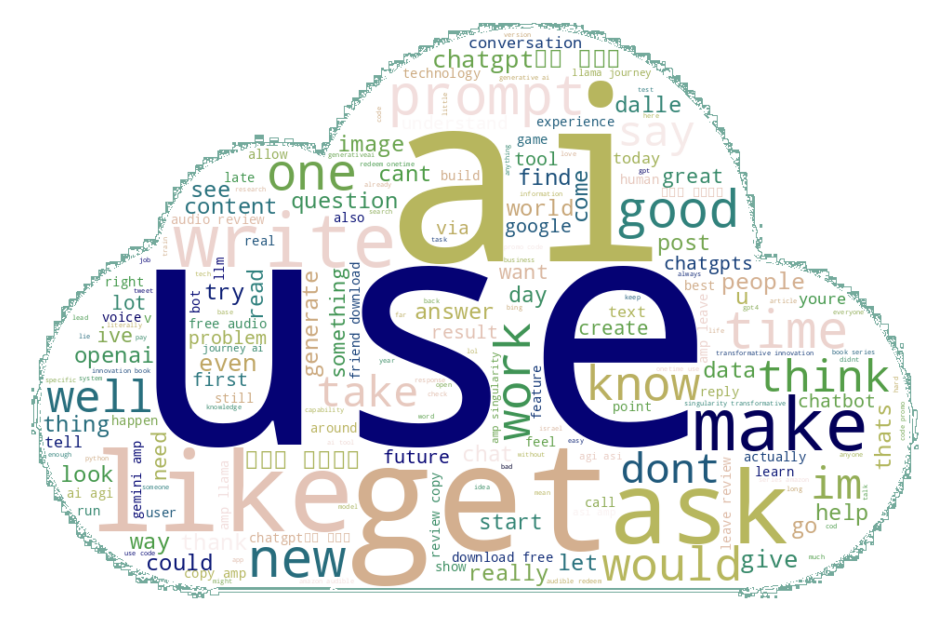

In [31]:
wordcloud_generate(long_string)